<a href="https://colab.research.google.com/github/KJOELJOYSON2427/NLP_SENTIMENTAL_ANALYSIS/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Basic
import os
from os import makedirs
from os import listdir
from random import seed, shuffle
from shutil import copyfile
from random import random
import numpy as np
import pandas as pd

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import  imread
from PIL import Image


In [37]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [34]:
#Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization, Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping


# Data Extraction

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import shutil
import random

# Source folders (in Drive)
cat_dir = "/content/drive/MyDrive/CNN/dataset/PetImages/Cat"
dog_dir = "/content/drive/MyDrive/CNN/dataset/PetImages/Dog"

In [9]:
# Destination folders (in Colab)
train_dir = "/content/train"
test_dir = "/content/test"

In [10]:
# Create destination directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [54]:
# Collect image paths
cat_images=[os.path.join(cat_dir, img) for img in os.listdir(cat_dir) if img.lower().endswith(('.jpg', ".png"))]
dog_images = [os.path.join(dog_dir, img) for img in os.listdir(dog_dir) if img.lower().endswith(('.jpg', '.png'))]

In [55]:
dog_images

['/content/drive/MyDrive/CNN/dataset/PetImages/Dog/301.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/1189.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/3085.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/6522.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/3829.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/11416.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/10258.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/12262.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/1031.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/4751.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/10317.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/4480.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/511.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/1252.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/2681.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/1280.jpg',
 '/con

In [59]:
shuffle(cat_images)
shuffle(dog_images)

In [61]:
# 🔹 Limit to 1000 each
cat_images = cat_images[:1000]
dog_images = dog_images[:1000]

dog_images

['/content/drive/MyDrive/CNN/dataset/PetImages/Dog/2421.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/10303.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/11886.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/5363.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/8860.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/8434.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/8745.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/6590.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/10007.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/5629.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/4685.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/5452.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/8664.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/132.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/6677.jpg',
 '/content/drive/MyDrive/CNN/dataset/PetImages/Dog/3420.jpg',
 '/con

In [62]:
# Split ratio (80% train, 20% test)
split_ratio = 0.8

In [63]:
cat_split = int(len(cat_images) * split_ratio)
dog_split = int(len(dog_images) * split_ratio)

In [64]:
# Copy and rename to match Kaggle style (cat.0.jpg, dog.0.jpg, etc.)
def copy_images(images, start_idx, dest_folder, prefix):
  for i, img_path in enumerate(images):

    new_name=f"{prefix}.{start_idx + i}.jpg"
    shutil.copy(img_path, os.path.join(dest_folder, new_name))

In [65]:
# Training set
copy_images(cat_images[:cat_split],0,train_dir,"cat")
copy_images(dog_images[:dog_split], 0, train_dir, "dog")

In [66]:
# Testing set
copy_images(cat_images[cat_split:], 0, test_dir, "cat")
copy_images(dog_images[dog_split:], 0, test_dir, "dog")

Loading Images in a ***Dataframe***

In [81]:
image_dirs = ["/content/train/", "/content/test/"]

filenames = []
labels = []

for image_dir in image_dirs:
    for filename in os.listdir(image_dir):
        filenames.append(os.path.join(image_dir, filename))
        labels.append(filename.split(".")[0])

data = pd.DataFrame(
    {"filename": filenames, "label": labels
})

# Separate cat and dog dataframes
cat_data = data[data['label'] == 'cat']
dog_data = data[data['label'] == 'dog']

# Sample 1485 cat images
cat_data_sampled = cat_data.sample(n=1485, random_state=42)

# Concatenate sampled cat data and all dog data
data = pd.concat([cat_data_sampled, dog_data], ignore_index=True)

display(data['label'].value_counts())

,count
label,
cat,1485
dog,1000


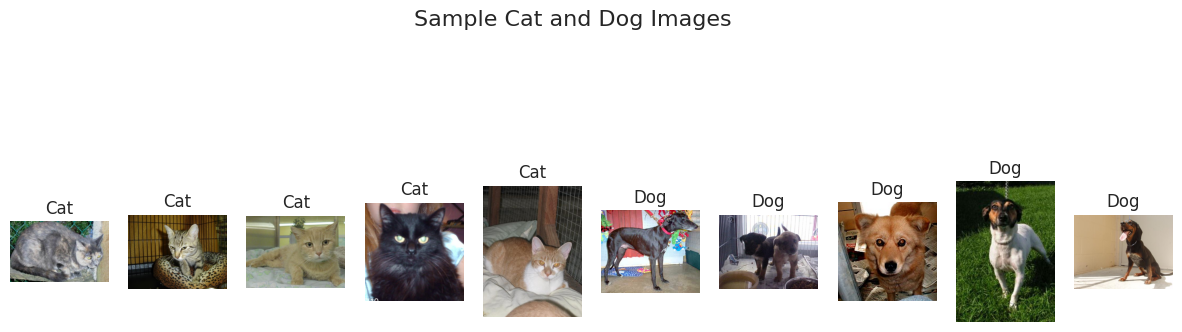

In [82]:
plt.figure(figsize=(15, 5))
for i in range(5):
    # Display a cat image
    cat_image_path = data[data['label'] == 'cat']['filename'].iloc[i]
    cat_image = imread(cat_image_path)
    plt.subplot(1, 10, i + 1)
    plt.imshow(cat_image)
    plt.title('Cat')
    plt.axis('off')

    # Display a dog image
    dog_image_path = data[data['label'] == 'dog']['filename'].iloc[i]
    dog_image = imread(dog_image_path)
    plt.subplot(1, 10, i + 6) # Offset by 5 for dog images
    plt.imshow(dog_image)
    plt.title('Dog')
    plt.axis('off')

plt.suptitle('Sample Cat and Dog Images', fontsize=16)
plt.show()

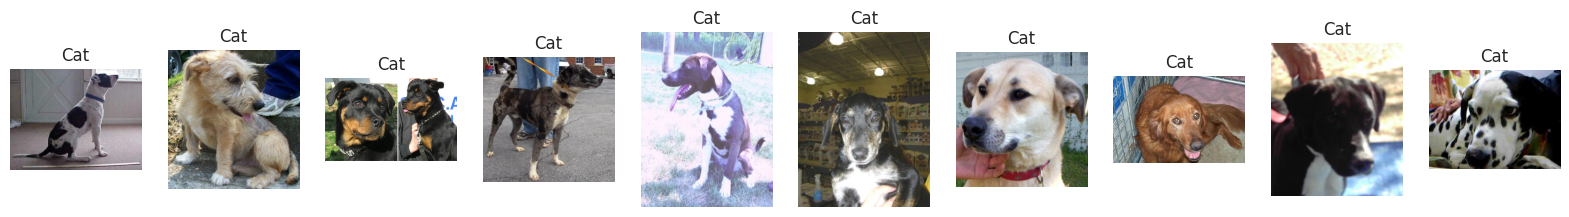

In [83]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()




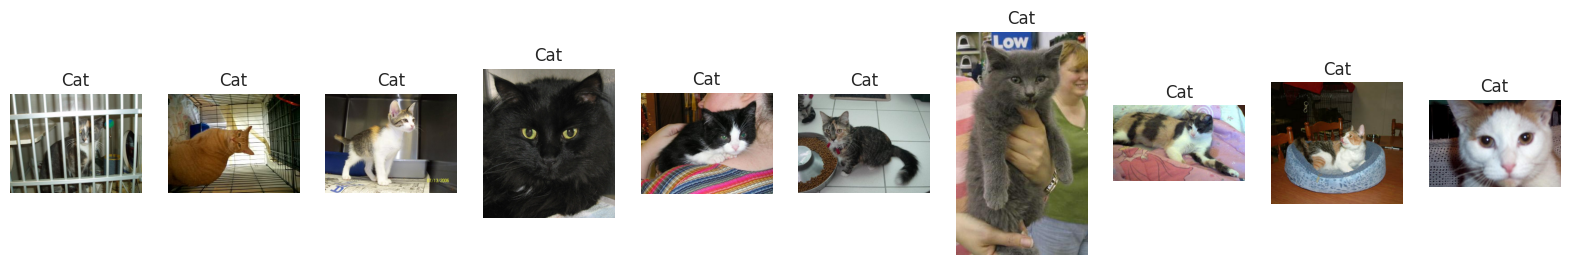

In [84]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

# Train Test Split

In [85]:
# train test split using dataframe
labels = data['label']
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state=42)

label_test_val =X_temp['label']
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)
print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (1988, 2)
The shape of test data (248, 2)
The shape of validation data (249, 2)


In [86]:


labels = ['Cat','Dog']


label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)



uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


In [87]:
plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

<Figure size 4000x1200 with 0 Axes>

/tmp/ipython-input-1766468037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
/tmp/ipython-input-1766468037.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
/tmp/ipython-input-1766468037.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',

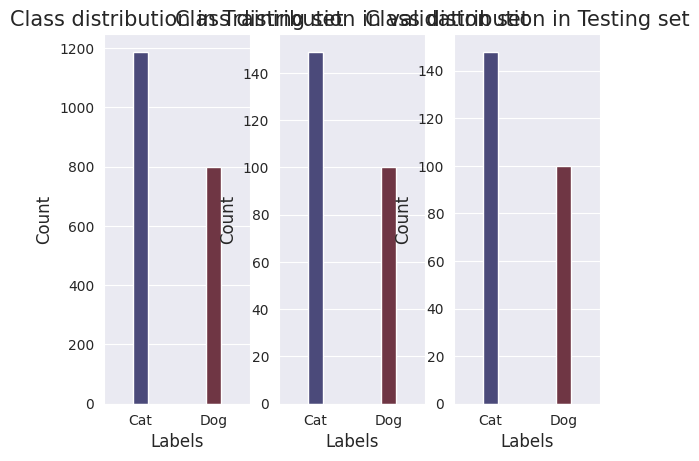

In [88]:
plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

In [89]:
from PIL import Image
from collections import Counter

# assuming your DataFrame is named 'data'
# and has a column 'filename' with full or relative paths

sizes = []

for path in data['filename']:
    try:
        img = Image.open(path)
        sizes.append(img.size)  # (width, height)
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Show the most common sizes
from collections import Counter
size_counts = Counter(sizes)
print("Most common image sizes:", size_counts.most_common(5))

# Optional: how many unique image sizes
print("Unique sizes:", len(size_counts))


Most common image sizes: [((500, 375), 568), ((375, 500), 57), ((500, 333), 52), ((320, 240), 48), ((400, 300), 26)]
Unique sizes: 1187


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
from PIL import Image
import os

# Set resize target
IMG_SIZE = (128, 128)

# Create new folders in Drive (change path)
drive_base = "/content/drive/MyDrive/CNN/resized"
os.makedirs(os.path.join(drive_base, "train"), exist_ok=True)
os.makedirs(os.path.join(drive_base, "test"), exist_ok=True)
os.makedirs(os.path.join(drive_base, "val"), exist_ok=True)

def resize_and_save(df, folder):
    for i, row in df.iterrows():
        try:
            img = Image.open(row['filename']).convert('RGB')
            img = img.resize(IMG_SIZE)
            label_folder = os.path.join(folder, row['label'])
            os.makedirs(label_folder, exist_ok=True)
            basename = os.path.basename(row['filename'])
            img.save(os.path.join(label_folder, basename))
        except Exception as e:
            print(f"Error resizing {row['filename']}: {e}")

resize_and_save(X_train, os.path.join(drive_base, "train"))
resize_and_save(X_test, os.path.join(drive_base, "test"))
resize_and_save(X_val, os.path.join(drive_base, "val"))

print("✅ All resized images saved in:", drive_base)


✅ All resized images saved in: /content/drive/MyDrive/CNN/resized


In [ ]:
# parameters

image_size = 128
image_channel = 3
bat_size = 32

# Image Data Generator

In [93]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

In [95]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [96]:
val_datagen = ImageDataGenerator(rescale=1./255)